# Pandas Primer - 2
- Reading files
    - CSV files
    - Excel files
    - URL
- Exporting data
- Exploring data
    - Summarizing data
    - Visualizing data

In [1]:
import pandas as pd

## 1. Reading files
- Pandas supports reading files from diverse source
    - CSV file
    - Excel file
    - etc
- Data in files are saved as DataFrame

### CSV files
- CSV files can be read using ```read_csv()``` function

In [2]:
# reading csv file
# with default parameter settings, index is set [0, 1, ... , n-1] (when there are n rows)
# first row is used as header (column names)
df = pd.read_csv('glass.csv')
print(df.head())
print(df.columns)
print(df.index)
print(df.shape)

   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0  2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83   0.0    0.00    1
1  3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0.0    0.00    1
2  4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0.0    0.00    1
3  5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07   0.0    0.00    1
4  6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07   0.0    0.26    1
Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')
RangeIndex(start=0, stop=213, step=1)
(213, 11)


In [3]:
# reading csv file with parameter settings
# header is set to None => use arbitray column names, not first row
# use first column as index (IDs from 1 to n)
df = pd.read_csv('glass.csv', header = None, index_col = 0)
print(df.head())
print(df.columns)
print(df.index)
print(df.shape)

        1      2     3     4      5     6     7    8    9   10
0                                                             
1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            205, 206, 207, 208, 209, 210, 211, 212, 213, 214],
           dtype='int64', name=0, length=214)
(214, 10)


In [4]:
# designating column names
# each element in col_names list is set to each column name
col_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_csv('glass.csv', header = None, index_col = 0, names = col_names)
print(df.head())
print(df.columns)
print(df.index)
print(df.shape)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            205, 206, 207, 208, 209, 210, 211, 212, 213, 214],
           dtype='int64', length=214)
(214, 10)


### Excel files
- Excel files(```.xlsx``` or ```.xls```) can be read using ```read_excel()``` function

### CPU data
- Relative performance of different CPUs
- source: https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/
- Number of instances (# rows): 209
- Number of attributes (# cols): 10
    - vendor name: adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
    - Model Name : many unique symbols
    - MYCT: machine cycle time in nanoseconds (integer)
    - MMIN: minimum main memory in kilobytes (integer)
    - MMAX: maximum main memory in kilobytes (integer)
    - CACH: cache memory in kilobytes (integer)
    - CHMIN: minimum channels in units (integer)
    - CHMAX: maximum channels in units (integer)
    - PRP: published relative performance (integer)
    - ERP: estimated relative performance from the original article (integer)

In [5]:
# reading excel file without parameter settings
# note that first row is used as header as default
df = pd.read_excel('cpu.xlsx')
print(df.head())
print(df.columns)
print(df.index)
print(df.shape)

  vendor_name model_name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     adviser      32/60   125   256   6000   256     16    128  198  199
1      amdahl     470v/7    29  8000  32000    32      8     32  269  253
2      amdahl    470v/7a    29  8000  32000    32      8     32  220  253
3      amdahl    470v/7b    29  8000  32000    32      8     32  172  253
4      amdahl    470v/7c    29  8000  16000    32      8     16  132  132
Index(['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')
RangeIndex(start=0, stop=209, step=1)
(209, 10)


In [6]:
# if there are several sheets, sheet_name parameter should be set
df = pd.read_excel('cpu.xlsx', sheet_name = 'Sheet1')
print(df.head())

  vendor_name model_name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     adviser      32/60   125   256   6000   256     16    128  198  199
1      amdahl     470v/7    29  8000  32000    32      8     32  269  253
2      amdahl    470v/7a    29  8000  32000    32      8     32  220  253
3      amdahl    470v/7b    29  8000  32000    32      8     32  172  253
4      amdahl    470v/7c    29  8000  16000    32      8     16  132  132


### Reading data from URL
- Read data directly from URL using ```read_table()```, ```read_csv()```, or ```read_excel()``` 
    - Which function to use? *Depends on the situation*
    - Try out all three of them, and satisfice when results are met
- Valid URL schemes include ```http, ftp, s3```, and file

In [8]:
# using read_table() to read data from url
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data' \
                  , sep = ',', header = None)
print(df.head())

         0        1    2     3      4    5   6    7    8    9
0  adviser    32/60  125   256   6000  256  16  128  198  199
1   amdahl   470v/7   29  8000  32000   32   8   32  269  253
2   amdahl  470v/7a   29  8000  32000   32   8   32  220  253
3   amdahl  470v/7b   29  8000  32000   32   8   32  172  253
4   amdahl  470v/7c   29  8000  16000   32   8   16  132  132


In [9]:
# using read_csv() to read data from url
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
df = pd.read_csv(url)
print(df.head())

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA


## 2. Exporting data
- Using Pandas, it is also convenient to export data 

In [10]:
l1 = [1., 2., 3., 4., 5.]
l2 = [1, 2, 3, 4, 5]
l3 = ['a', 'b', 'c', 'd', 'e']
l4 = ['A', 'B', 'C', 'D', 'E']
df = pd.DataFrame({'float': l1, 'int': l2, 'lower': l3, 'upper': l4})
print(df)

   float  int lower upper
0    1.0    1     a     A
1    2.0    2     b     B
2    3.0    3     c     C
3    4.0    4     d     D
4    5.0    5     e     E


In [11]:
# saving CSV file
df.to_csv('csv_example.csv')

In [12]:
# saving excel file
df.to_excel('excel_example.xlsx')

## 3. Exploring data
- Pandas provides convenient ways to explore data

### Summarizing data

In [13]:
# we keep our example with CPU data
df = pd.read_excel('cpu.xlsx')
print(df.head())       # first 5 rows
print(df.tail())       # last 5 rows

  vendor_name model_name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     adviser      32/60   125   256   6000   256     16    128  198  199
1      amdahl     470v/7    29  8000  32000    32      8     32  269  253
2      amdahl    470v/7a    29  8000  32000    32      8     32  220  253
3      amdahl    470v/7b    29  8000  32000    32      8     32  172  253
4      amdahl    470v/7c    29  8000  16000    32      8     16  132  132
    vendor_name           model_name  MYCT  MMIN  MMAX  CACH  CHMIN  CHMAX  \
204      sperry  1980-08-01 00:00:00   124  1000  8000     0      1      8   
205      sperry        90/80-model-3    98  1000  8000    32      2      8   
206      sratus                   32   125  2000  8000     0      2     14   
207        wang               vs-100   480   512  8000    32      0      0   
208        wang                vs-90   480  1000  4000     0      0      0   

     PRP  ERP  
204   42   37  
205   46   50  
206   52   41  
207   67   47  
208   4

In [14]:
# summarizing whole DataFrame
# columns with numerical values are described
print(df.describe())

              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
75%     24.

In [15]:
# describing only one column at a time
print(df['MYCT'].describe())

count     209.000000
mean      203.822967
std       260.262926
min        17.000000
25%        50.000000
50%       110.000000
75%       225.000000
max      1500.000000
Name: MYCT, dtype: float64


### Visualizing data

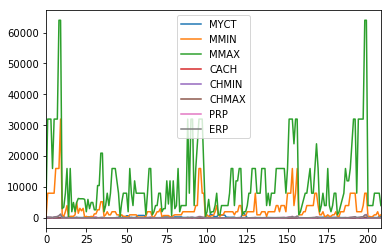

In [16]:
# plotting dataset
import matplotlib.pyplot as plt
df.plot()
plt.show()

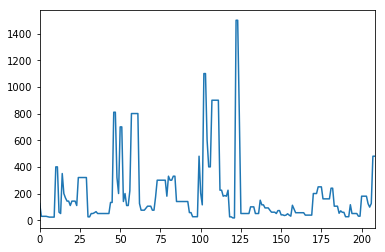

In [17]:
# plotting variable (column)
df['MYCT'].plot()
plt.show()

In [ ]:
# plotting multiple columns at a time
df[['MYCT', 'CACH']].plot(kind = 'scatter')
plt.show()

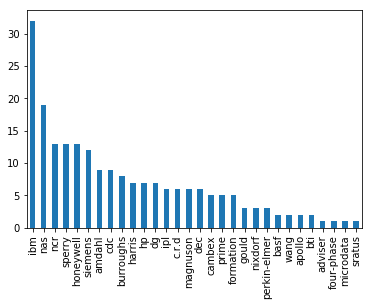

In [19]:
# what about categorical variables?
counts = df['vendor_name'].value_counts()
counts.plot(kind = 'bar')
plt.show()

### Exercise 2-1.
- Import dataset as DataFrame in below URL, by three methods
    - Export directly via URL
    - Save dataset as CSV file, and import
    - Save dataset as Excel file, and import
- URL: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [ ]:
## Your answer

### Exercise 2-2.
- Describe first three variables (columns) of dataset imported above
- Plot three variables 
- Count number of instances in last column (car name), and identify which car names occurs most frequently

In [ ]:
## Your answer

### Exercise 2-3.
- Convert above DataFrame into NumPy array (excluding last column)
- Compute average and standard deviation of each column
     - use ```mean()``` and ```std()``` functions
- Perform same action to original DataFrame
    - Are the results identical?

In [ ]:
## Your answer